In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-05-23 16:01:03--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.128, 2607:f8b0:4001:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   212MB/s    in 0.7s    

2020-05-23 16:01:04 (212 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()


In [0]:
train_hor = os.path.join('/tmp/horse-or-human/horses')

train_hum = os.path.join('/tmp/horse-or-human/humans')

In [4]:
train_hor_name = os.listdir(train_hor)
print(train_hor_name[:10])

train_hum_name = os.listdir(train_hum)
print(train_hum_name)

['horse17-2.png', 'horse35-4.png', 'horse43-7.png', 'horse46-5.png', 'horse13-7.png', 'horse04-2.png', 'horse02-7.png', 'horse28-1.png', 'horse17-1.png', 'horse50-9.png']
['human06-10.png', 'human14-28.png', 'human12-16.png', 'human13-30.png', 'human17-00.png', 'human14-00.png', 'human01-17.png', 'human07-03.png', 'human08-13.png', 'human17-13.png', 'human02-28.png', 'human04-29.png', 'human06-16.png', 'human11-04.png', 'human15-17.png', 'human04-01.png', 'human15-12.png', 'human12-24.png', 'human07-30.png', 'human13-08.png', 'human04-19.png', 'human03-18.png', 'human08-23.png', 'human11-25.png', 'human12-03.png', 'human09-25.png', 'human10-07.png', 'human02-27.png', 'human16-11.png', 'human08-05.png', 'human15-13.png', 'human03-07.png', 'human13-02.png', 'human12-20.png', 'human11-08.png', 'human15-20.png', 'human09-03.png', 'human10-11.png', 'human10-28.png', 'human09-26.png', 'human07-17.png', 'human10-26.png', 'human11-10.png', 'human07-13.png', 'human06-20.png', 'human07-25.png', 

In [5]:
print('total training horse:',len(os.listdir(train_hor)))
print("total human training images",len(os.listdir(train_hum)))

total training horse: 500
total human training images 527


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index =0

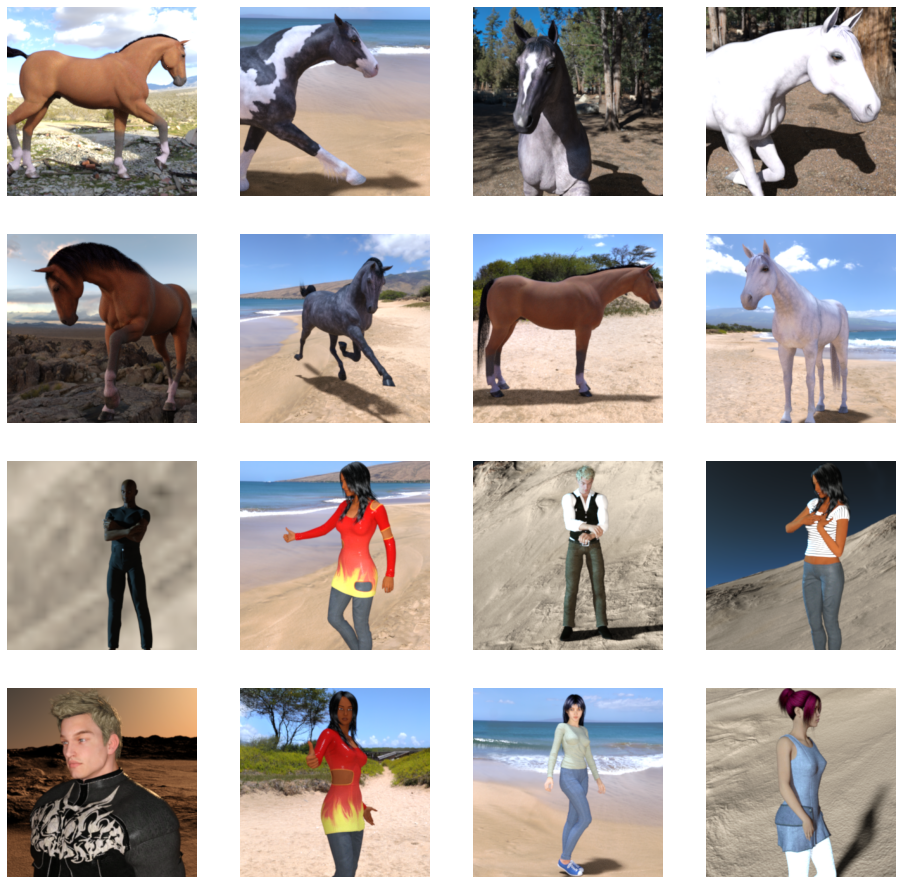

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index+=8
next_horse_pix = [os.path.join(train_hor, fname) for fname in train_hor_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_hum, fname) for fname in train_hum_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.


In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 64s 8s/step - loss: 0.6948 - accuracy: 0.5217
Epoch 2/15
8/8 [==============================] - 63s 8s/step - loss: 0.7893 - accuracy: 0.5428
Epoch 3/15
8/8 [==============================] - 63s 8s/step - loss: 0.6789 - accuracy: 0.5495
Epoch 4/15
8/8 [==============================] - 64s 8s/step - loss: 0.7914 - accuracy: 0.6085
Epoch 5/15
8/8 [==============================] - 63s 8s/step - loss: 0.5859 - accuracy: 0.6685
Epoch 6/15
8/8 [==============================] - 72s 9s/step - loss: 0.6404 - accuracy: 0.7441
Epoch 7/15
8/8 [==============================] - 62s 8s/step - loss: 0.4191 - accuracy: 0.8109
Epoch 8/15
8/8 [==============================] - 63s 8s/step - loss: 0.4228 - accuracy: 0.8543
Epoch 9/15
8/8 [==============================] - 62s 8s/step - loss: 0.3099 - accuracy: 0.8576
Epoch 10/15
8/8 [==============================] - 62s 8s/step - loss: 0.4322 - accuracy: 0.8699
Epoch 11/15
8/8 [======================

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving MODIFILE.jfif to MODIFILE.jfif
[1.]
MODIFILE.jfif is a human
